In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, LSTM, Dense, BatchNormalization, Dropout
from keras.models import Model
from matplotlib import pyplot as plt
from IPython.display import clear_output
from modules.lstm_decoder import LSTMDecoder
from modules.callbacks import PlotLosses

Using TensorFlow backend.


## Data

In [2]:
features_train = np.load('./features/lstm/encoded/features_train.npy')
features_dev = np.load('./features/lstm/encoded/features_dev.npy')
indices_train = np.load('./features/lstm/2_steps/indices_train.npy')
indices_dev = np.load('./features/lstm/2_steps/indices_dev.npy')
classes_train = np.load('./features/res_net/classes_train_make-model.npy')[indices_train]
classes_dev = np.load('./features/res_net/classes_dev_make-model.npy')[indices_dev]

In [3]:
print(features_train.shape)
print(features_dev.shape)
print(classes_train.shape)
print(classes_dev.shape)

(19185, 2, 2048)
(998, 2, 2048)
(19185,)
(998,)


## Training

In [5]:
decoder = LSTMDecoder(
    features_train, 
    classes_train, 
    features_dev, 
    classes_dev, 
    lr=0.000001,
#    weights_path='./convnet_weights/lstm/weights.24-0.98.hdf5'
)

In [6]:
plot_losses = PlotLosses()
checkpoint = keras.callbacks.ModelCheckpoint(
    './convnet_weights/lstm/weights.{epoch:02d}-{val_loss:.2f}.hdf5', 
    monitor='val_loss',
    verbose=0, 
    save_best_only=False, 
    save_weights_only=True, 
    mode='auto', 
    period=1,
)

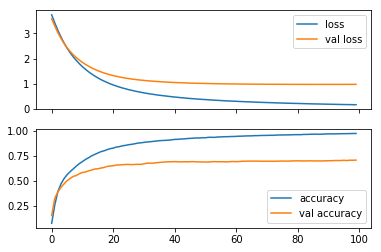

Epoch 1
-----------------------
- Loss: 3.72648980988
- Accuracy: 0.0777169663544
- Validation loss: 3.57383505089
- Validation accuracy: 0.155310621929
 
Epoch 2
-----------------------
- Loss: 3.41236306687
- Accuracy: 0.259160802746
- Validation loss: 3.28873237675
- Validation accuracy: 0.325651303441
 
Epoch 3
-----------------------
- Loss: 3.12063761105
- Accuracy: 0.391555902973
- Validation loss: 3.02815796187
- Validation accuracy: 0.388777555648
 
Epoch 4
-----------------------
- Loss: 2.85639484158
- Accuracy: 0.468334636359
- Validation loss: 2.79894264428
- Validation accuracy: 0.434869739778
 
Epoch 5
-----------------------
- Loss: 2.62047592051
- Accuracy: 0.521918165177
- Validation loss: 2.60179457206
- Validation accuracy: 0.469939879939
 
Epoch 6
-----------------------
- Loss: 2.41328451742
- Accuracy: 0.561428199014
- Validation loss: 2.43119210805
- Validation accuracy: 0.502004010763
 
Epoch 7
-----------------------
- Loss: 2.23131122743
- Accuracy: 0.5922856

 
Epoch 71
-----------------------
- Loss: 0.25953316803
- Accuracy: 0.953765962818
- Validation loss: 0.983572099992
- Validation accuracy: 0.696392784138
 
Epoch 72
-----------------------
- Loss: 0.256443256642
- Accuracy: 0.954860568022
- Validation loss: 0.983077085807
- Validation accuracy: 0.696392784138
 
Epoch 73
-----------------------
- Loss: 0.253132012736
- Accuracy: 0.954495699591
- Validation loss: 0.982165780239
- Validation accuracy: 0.696392784138
 
Epoch 74
-----------------------
- Loss: 0.247168461763
- Accuracy: 0.956945530254
- Validation loss: 0.981479405043
- Validation accuracy: 0.696392784138
 
Epoch 75
-----------------------
- Loss: 0.24425272826
- Accuracy: 0.957623142907
- Validation loss: 0.981357495985
- Validation accuracy: 0.697394788146
 
Epoch 76
-----------------------
- Loss: 0.240919487266
- Accuracy: 0.957988011623
- Validation loss: 0.980927268465
- Validation accuracy: 0.698396792154
 
Epoch 77
-----------------------
- Loss: 0.236034084244
- 

In [7]:
decoder.train(100, [plot_losses, checkpoint])

## LSTM

In [ ]:
inputs = Input(shape=input_shape)
X = BatchNormalization()(inputs)
X = LSTM(1024)(X)
outputs = Dense(output_shape, activation='softmax')(X)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

## Dense

In [ ]:
features_train_dense = np.concatenate([features_train[:, 0, :], features_train[:, 1, :]], axis=1)
features_dev_dense = np.concatenate([features_dev[:, 0, :], features_dev[:, 1, :]], axis=1)

In [ ]:
inputs = Input(shape=[features_train_dense.shape[1]])
X = BatchNormalization()(inputs)
X = Dense(2048, activation='relu')(X)
outputs = Dense(output_shape, activation='softmax')(X)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

In [ ]:
model.compile(
    optimizer=tf.train.AdamOptimizer(0.000001),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

model.load_weights('./convnet_weights/lstm/weights.37-1.27.hdf5')

In [ ]:
model.fit(
    features_train_dense,
    classes_train,
    batch_size=128,
    epochs=100,
    verbose=True,
    callbacks=[plot_losses, checkpoint],
    validation_data=(features_dev_dense, classes_dev)
)